In [1]:
import torch
from tools.vit_model import ViT
import matplotlib.pyplot as plt

In [2]:
adam = torch.load("out_adam.pt", map_location=torch.device('cpu'))
md = torch.load("out_md.pt", map_location=torch.device('cpu'))

/tmp/ipykernel_879/62821757.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adam = torch.load("out_adam.pt", map_location=torch.device('cpu'))
/tmp/ipykernel_879/6282175

# Histogram of Weights

In [3]:
def get_k_parameters(model):
    parameter = []
    for attn, _ in model.transformer.layers:
        parameter.append(attn.fn.to_qkv.weight.data.abs()[512:1024, :])
    return torch.cat(parameter)

In [4]:
def get_q_parameters(model):
    parameter = []
    for attn, _ in model.transformer.layers:
        parameter.append(attn.fn.to_qkv.weight.data.abs()[:512, :])
    return torch.cat(parameter)

In [5]:
def get_v_parameters(model):
    parameter = []
    for attn, _ in model.transformer.layers:
        parameter.append(attn.fn.to_qkv.weight.data.abs()[1024:, :])
    return torch.cat(parameter)

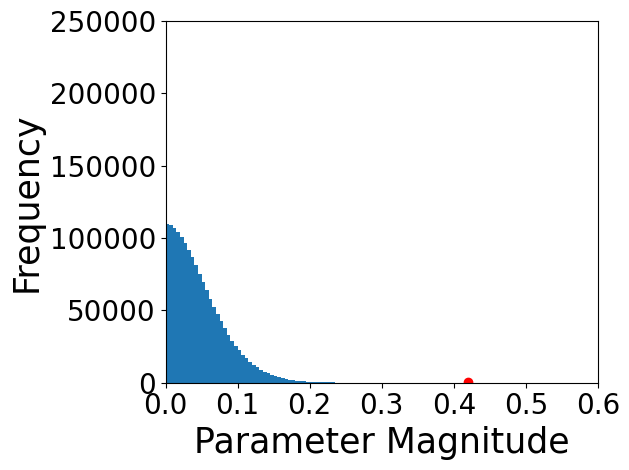

In [6]:
model = adam["model"]
parameter = get_k_parameters(model).flatten()
hist = torch.histogram(parameter, bins=torch.tensor([0.0 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 600,'ro') 
plt.xlim([0.0, 0.6])
plt.ylim([0.0, 250_000])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Parameter Magnitude", fontsize=25)
plt.ylabel("Frequency", fontsize=25)
plt.tight_layout()
plt.savefig("Parameter_K_Adam.jpg", bbox_inches='tight')
plt.show()

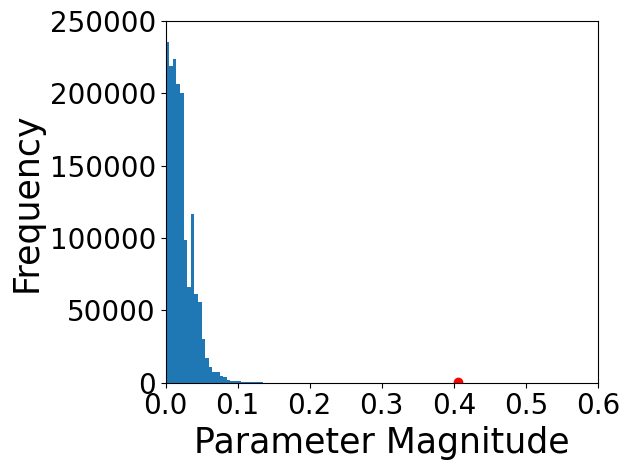

In [7]:
model = md["model"]
parameter = get_k_parameters(model).flatten()
hist = torch.histogram(parameter, bins=torch.tensor([0.0 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 600,'ro') 
plt.xlim([0.0, 0.6])
plt.ylim([0, 250_000])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Parameter Magnitude", fontsize=25)
plt.ylabel("Frequency", fontsize=25)
plt.tight_layout()
plt.savefig("Parameter_K_MD.jpg", bbox_inches='tight')
plt.show()

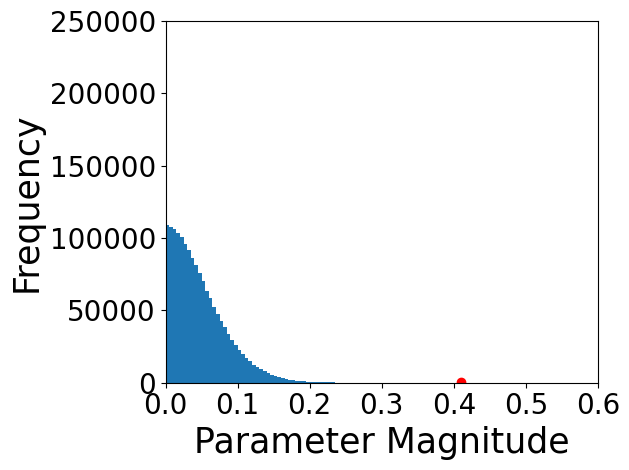

In [8]:
model = adam["model"]
parameter = get_q_parameters(model).flatten()
hist = torch.histogram(parameter, bins=torch.tensor([0.0 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 600,'ro') 
plt.xlim([0.0, 0.6])
plt.ylim([0, 250_000])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Parameter Magnitude", fontsize=25)
plt.ylabel("Frequency", fontsize=25)
plt.tight_layout()
plt.savefig("Parameter_Q_Adam.jpg", bbox_inches='tight')
plt.show()

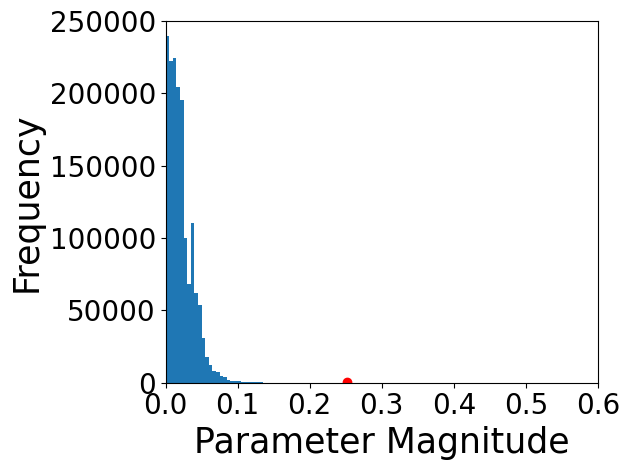

In [9]:
model = md["model"]
parameter = get_q_parameters(model).flatten()
hist = torch.histogram(parameter, bins=torch.tensor([0.0 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 600,'ro') 
plt.xlim([0.0, 0.6])
plt.ylim([0, 250_000])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Parameter Magnitude", fontsize=25)
plt.ylabel("Frequency", fontsize=25)
plt.tight_layout()
plt.savefig("Parameter_Q_MD.jpg", bbox_inches='tight')
plt.show()

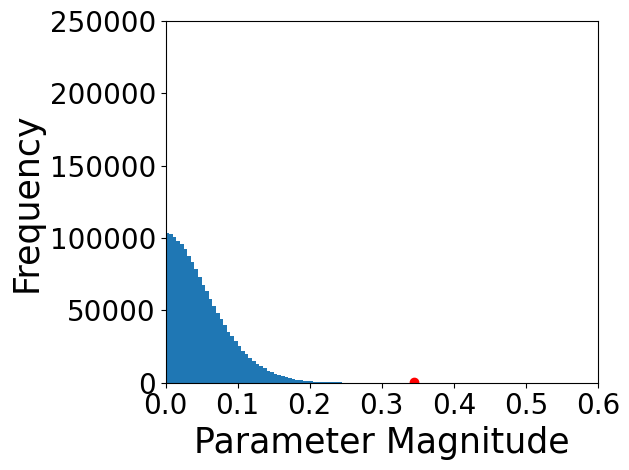

In [10]:
model = adam["model"]
parameter = get_v_parameters(model).flatten()
hist = torch.histogram(parameter, bins=torch.tensor([0.0 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 600,'ro') 
plt.xlim([0.0, 0.6])
plt.ylim([0, 250_000])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Parameter Magnitude", fontsize=25)
plt.ylabel("Frequency", fontsize=25)
plt.tight_layout()
plt.savefig("Parameter_V_Adam.jpg", bbox_inches='tight')
plt.show()

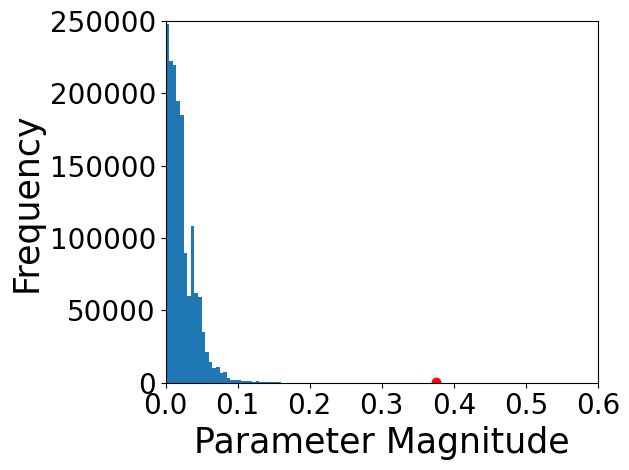

In [11]:
model = md["model"]
parameter = get_v_parameters(model).flatten()
hist = torch.histogram(parameter, bins=torch.tensor([0.0 + 0.005 * idx for idx in range(200)]))
plt.stairs(hist.hist.detach().numpy(), hist.bin_edges.detach().numpy(), fill=True)
plt.plot(parameter.max(), 600,'ro') 
plt.xlim([0.0, 0.6])
plt.ylim([0, 250_000])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Parameter Magnitude", fontsize=25)
plt.ylabel("Frequency", fontsize=25)
plt.tight_layout()
plt.savefig("Parameter_V_MD.jpg", bbox_inches='tight')
plt.show()

# Test Accuracies Plot

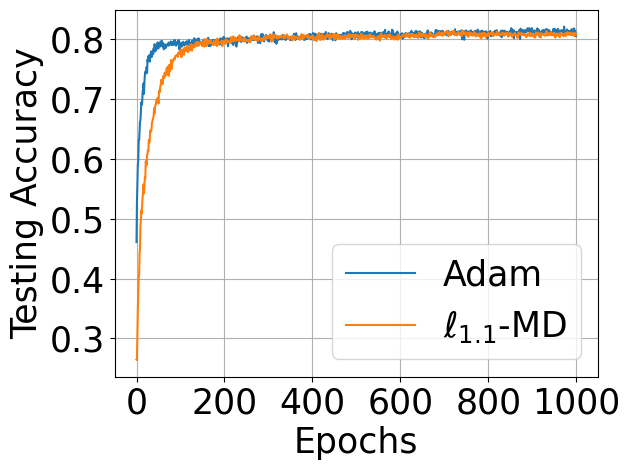

In [13]:
plt.plot(adam["test_accuracies"], label="Adam")
plt.plot(md["test_accuracies"], label=fr'$\ell_{{1.1}}$-MD')
plt.grid()
plt.legend()
plt.xlabel("Epochs", fontsize=25)
plt.ylabel("Testing Accuracy", fontsize=25)
plt.legend(fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.savefig("ViT_acc.jpg")
plt.show()